#Plotting and analyzing gatekeeper mutants for Src and Abl using bosutinib isomer data

We are plotting fluorescence assay spectra collected according to this lab-protocols protocol. Further details of the specific experiment can be found in the fluorescence assay lab notebook on December 15-18, 2015. This notebook is a deeper analysis of data from the 'Spectra-Assay-Analysis' notebook.

This notebook is meant to make a high quality figure showing the shift in bosutinib isomer affinity as a result of the gatekeeper mutant.

In [1]:
import grant
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
file_set = {'Src': glob("../spectra/2015-12-15/*.xml"),
        'SrcGK': glob("../spectra/2015-12-16/*.xml"),
        'AblGK': glob("../spectra/2015-12-17/*.xml"),
        'Abl': glob("../spectra/2015-12-18/*.xml")}

In [3]:
#Define ligands and ligand concentration
ligands = ['Bosutinib','Bosutinib Isomer','Erlotinib','Gefitinib']
ligand_conc = np.array([20.0e-6,9.15e-6,4.18e-6,1.91e-6,0.875e-6,0.4e-6,0.183e-6,0.0837e-6,0.0383e-6,0.0175e-6,0.008e-6,0.0001e-6], np.float64) # ligand concentration, M

In [4]:
ligand_conc

array([  2.00000000e-05,   9.15000000e-06,   4.18000000e-06,
         1.91000000e-06,   8.75000000e-07,   4.00000000e-07,
         1.83000000e-07,   8.37000000e-08,   3.83000000e-08,
         1.75000000e-08,   8.00000000e-09,   1.00000000e-10])

In [5]:
SrcGK_BSI = grant.xml2df(file_set['SrcGK'][1])

In [6]:
SrcGK_BSI.head()

fluorescence                                               \
Well                      C1       C2       C3       C4       C5       C6   
wavelength (nm)                                                             
280                  3289277  3289277  3289277  3289277  3289277  3289277   
285                  3289277  3289277  3289277  3289277  3289277  3289277   
290                  3289277  3289277  3289277  3289277  3289277  3289277   
295                  3289277  3289277  3289277  3289277  3289277  3289277   
300                  3289277  3289277  3289277  3289277  3289277  3289277   

                                                      ...              \
Well                  C7       C8       C9      C10   ...          D3   
wavelength (nm)                                       ...               
280              3289277  3289277  3289277  3289277   ...     3289277   
285              3289277  3289277  3289277  3289277   ...     3289277   
290              3289277  3289277  3289277  3289277   ...     3289277   
295              3289277  3289277  3289277  3289277   ...     3289277   
300              3289277  3289277  3289277  3289277   ...     3289277   

                                                                       \
Well                  D4       D5       D6       D7       D8       D9   
wavelength (nm)                                                         
280              3289277  3289277  3289277  3289277  3289277  3289277   
285              3289277  3289277  3289277  3289277  3289277  3289277   
290              3289277  3289277  3289277  3289277  3289277  3289277   
295              3289277  3289277  3289277  3289277  3289277  3289277   
300              3289277  3289277  3289277  3289277  3289277  3289277   

                                            
Well                 D10      D11      D12  
wavelength (nm)                             
280              3289277  3289277  3289277  
285              3289277  3289277  3289277  
290              3289277  3289277  3289277  
295              3289277  3289277  3289277  
300              3289277  3289277  3289277  

[5 rows x 24 columns]

In [7]:
SrcGK_BSI.head()

fluorescence                                               \
Well                      C1       C2       C3       C4       C5       C6   
wavelength (nm)                                                             
280                  3289277  3289277  3289277  3289277  3289277  3289277   
285                  3289277  3289277  3289277  3289277  3289277  3289277   
290                  3289277  3289277  3289277  3289277  3289277  3289277   
295                  3289277  3289277  3289277  3289277  3289277  3289277   
300                  3289277  3289277  3289277  3289277  3289277  3289277   

                                                      ...              \
Well                  C7       C8       C9      C10   ...          D3   
wavelength (nm)                                       ...               
280              3289277  3289277  3289277  3289277   ...     3289277   
285              3289277  3289277  3289277  3289277   ...     3289277   
290              3289277  3289277  3289277  3289277   ...     3289277   
295              3289277  3289277  3289277  3289277   ...     3289277   
300              3289277  3289277  3289277  3289277   ...     3289277   

                                                                       \
Well                  D4       D5       D6       D7       D8       D9   
wavelength (nm)                                                         
280              3289277  3289277  3289277  3289277  3289277  3289277   
285              3289277  3289277  3289277  3289277  3289277  3289277   
290              3289277  3289277  3289277  3289277  3289277  3289277   
295              3289277  3289277  3289277  3289277  3289277  3289277   
300              3289277  3289277  3289277  3289277  3289277  3289277   

                                            
Well                 D10      D11      D12  
wavelength (nm)                             
280              3289277  3289277  3289277  
285              3289277  3289277  3289277  
290              3289277  3289277  3289277  
295              3289277  3289277  3289277  
300              3289277  3289277  3289277  

[5 rows x 24 columns]

In [8]:
SrcGK_BSI_480 = SrcGK_BSI.loc[480][:12]

In [9]:
SrcGK_BSI_480.values

array([ 65202.,  64861.,  55253.,  37296.,  19109.,   9659.,   5966.,
         6148.,   2405.,   2503.,   2019.,   1768.])

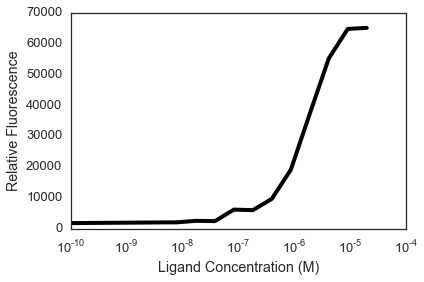

In [10]:
plt.semilogx(ligand_conc,SrcGK_BSI_480.values,linewidth=4,color='k')
plt.xlabel('Ligand Concentration (M)')
plt.ylabel('Relative Fluorescence')
plt.tight_layout();
plt.savefig('binding.png',dpi=1000)

In [11]:
Src_BSI = grant.xml2df(file_set['Src'][1])
Src_BSI_480 = Src_BSI.loc[480][:12]

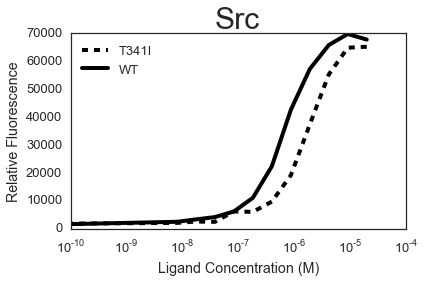

In [12]:
plt.semilogx(ligand_conc,SrcGK_BSI_480.values,linewidth=4,color='k',linestyle='--',label='T341I')
plt.semilogx(ligand_conc,Src_BSI_480.values,linewidth=4,color='k',label='WT')
plt.legend(loc=0)
plt.title('Src',fontsize=30)
plt.xlabel('Ligand Concentration (M)')
plt.ylabel('Relative Fluorescence')
plt.tight_layout();
plt.savefig('Src_GK.eps',type='eps',dpi=1000)

In [13]:
AblGK_BSI = grant.xml2df(file_set['AblGK'][1])
AblGK_BSI_480 = AblGK_BSI.loc[480][:12]
Abl_BSI = grant.xml2df(file_set['Abl'][1])
Abl_BSI_480 = Abl_BSI.loc[480][:12]

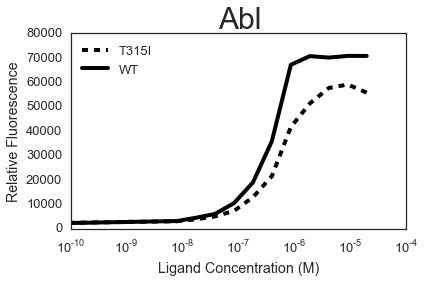

In [14]:
plt.semilogx(ligand_conc,AblGK_BSI_480.values,linewidth=4,color='k',linestyle='--',label='T315I')
plt.semilogx(ligand_conc,Abl_BSI_480.values,linewidth=4,color='k',label='WT')
plt.legend(loc=2)
plt.title('Abl',fontsize=30)
plt.xlabel('Ligand Concentration (M)')
plt.ylabel('Relative Fluorescence')
plt.tight_layout();
plt.savefig('Abl_GK.eps',type='eps',dpi=1000)

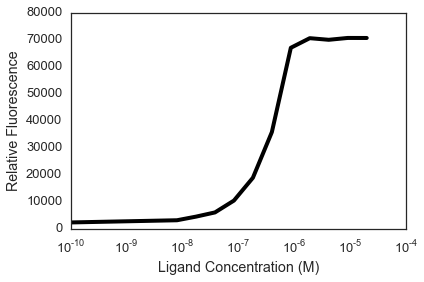

In [15]:
plt.semilogx(ligand_conc,Abl_BSI_480.values,linewidth=4,color='k')
plt.xlabel('Ligand Concentration (M)')
plt.ylabel('Relative Fluorescence')
plt.tight_layout();
plt.savefig('binding.png',dpi=1000)

In [16]:
# Below are new figures

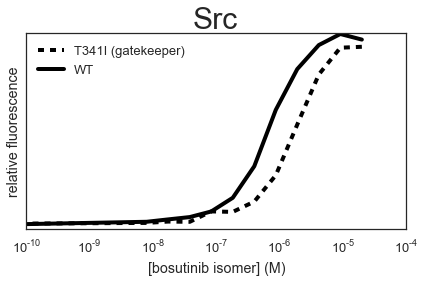

In [17]:
plt.semilogx(ligand_conc,SrcGK_BSI_480.values,linewidth=4,color='k',linestyle='--',label='T341I (gatekeeper)')
plt.semilogx(ligand_conc,Src_BSI_480.values,linewidth=4,color='k',label='WT')
plt.legend(loc=0)
plt.title('Src',fontsize=30)
plt.xlabel('[bosutinib isomer] (M)')
plt.ylabel('relative fluorescence')
plt.yticks([])
plt.tight_layout();
plt.savefig('Src_GK_grant.eps',type='eps',dpi=1000)

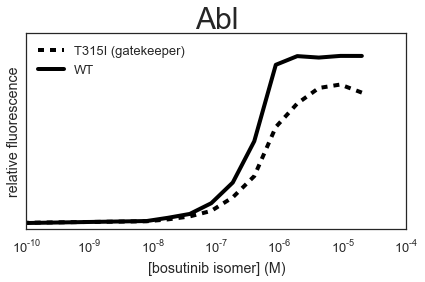

In [18]:
plt.semilogx(ligand_conc,AblGK_BSI_480.values,linewidth=4,color='k',linestyle='--',label='T315I (gatekeeper)')
plt.semilogx(ligand_conc,Abl_BSI_480.values,linewidth=4,color='k',label='WT')
plt.legend(loc=2)
plt.title('Abl',fontsize=30)
plt.xlabel('[bosutinib isomer] (M)')
plt.ylabel('relative fluorescence')
plt.yticks([])
plt.tight_layout();
plt.savefig('Abl_GK_grant.eps',type='eps',dpi=1000)

In [19]:
# below are new normalized figures

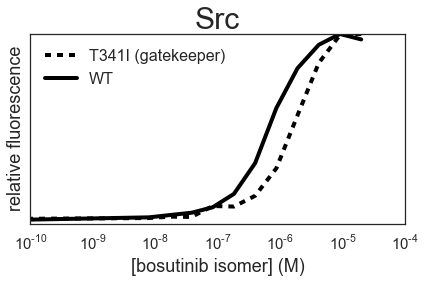

In [20]:

plt.semilogx(ligand_conc,SrcGK_BSI_480.values/SrcGK_BSI_480.values.max(),linewidth=4,color='k',linestyle='--',label='T341I (gatekeeper)')
plt.semilogx(ligand_conc,Src_BSI_480.values/Src_BSI_480.values.max(),linewidth=4,color='k',label='WT')
plt.legend(loc=0,fontsize=16)
plt.title('Src',fontsize=30)
plt.xlabel('[bosutinib isomer] (M)',fontsize=18)
plt.ylabel('relative fluorescence',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks([])
plt.tight_layout();
plt.savefig('Src_GK_grant.eps',type='eps',dpi=1000)

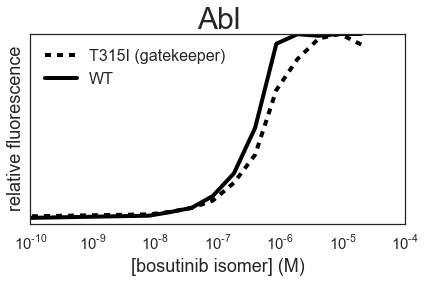

In [21]:
plt.semilogx(ligand_conc,AblGK_BSI_480.values/AblGK_BSI_480.values.max(),linewidth=4,color='k',linestyle='--',label='T315I (gatekeeper)')
plt.semilogx(ligand_conc,Abl_BSI_480.values/Abl_BSI_480.values.max(),linewidth=4,color='k',label='WT')
plt.legend(loc=2,fontsize=16)
plt.title('Abl',fontsize=30)
plt.xlabel('[bosutinib isomer] (M)',fontsize=18)
plt.ylabel('relative fluorescence',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks([])
plt.tight_layout();
plt.savefig('Abl_GK_grant.eps',type='eps',dpi=1000)

['../spectra/2015-12-17/AblD382N-T334I_Bos_20151217_bw2020_gain120_120553.xml', '../spectra/2015-12-17/AblD382N-T334I_BosI_20151217_bw2020_gain120123031.xml', '../spectra/2015-12-17/AblD382N-T334I_Erl_20151217_bw2020_gain120_125515.xml', '../spectra/2015-12-17/AblD382N-T334I_Gef_20151217_bw2020_gain120_132641.xml']
['../spectra/2015-12-15/Src_Bos_20151215_bw2020_gain120_161211.xml', '../spectra/2015-12-15/Src_BosI_20151215_bw2020_gain120_163633.xml', '../spectra/2015-12-15/Src_Erl_20151215_bw2020_gain120_170056.xml', '../spectra/2015-12-15/Src_Gef_20151215_bw2020_gain120_172518.xml']
['../spectra/2015-12-18/AblD382N_Bos_20151218_bw2020_gain120_ 14-41-14_plate_1.xml', '../spectra/2015-12-18/AblD382N_BosI_20151218_bw2020_gain12014-55-55_plate_1.xml', '../spectra/2015-12-18/AblD382N_Erl_20151218_bw2020_gain120 15-11-11_plate_1.xml', '../spectra/2015-12-18/AblD382N_Gef_20151218_bw2020_gain120 15-25-58_plate_1.xml']
['../spectra/2015-12-16/SrcT338I_Bos_20151216_bw2020_gain120_152505.xml', '

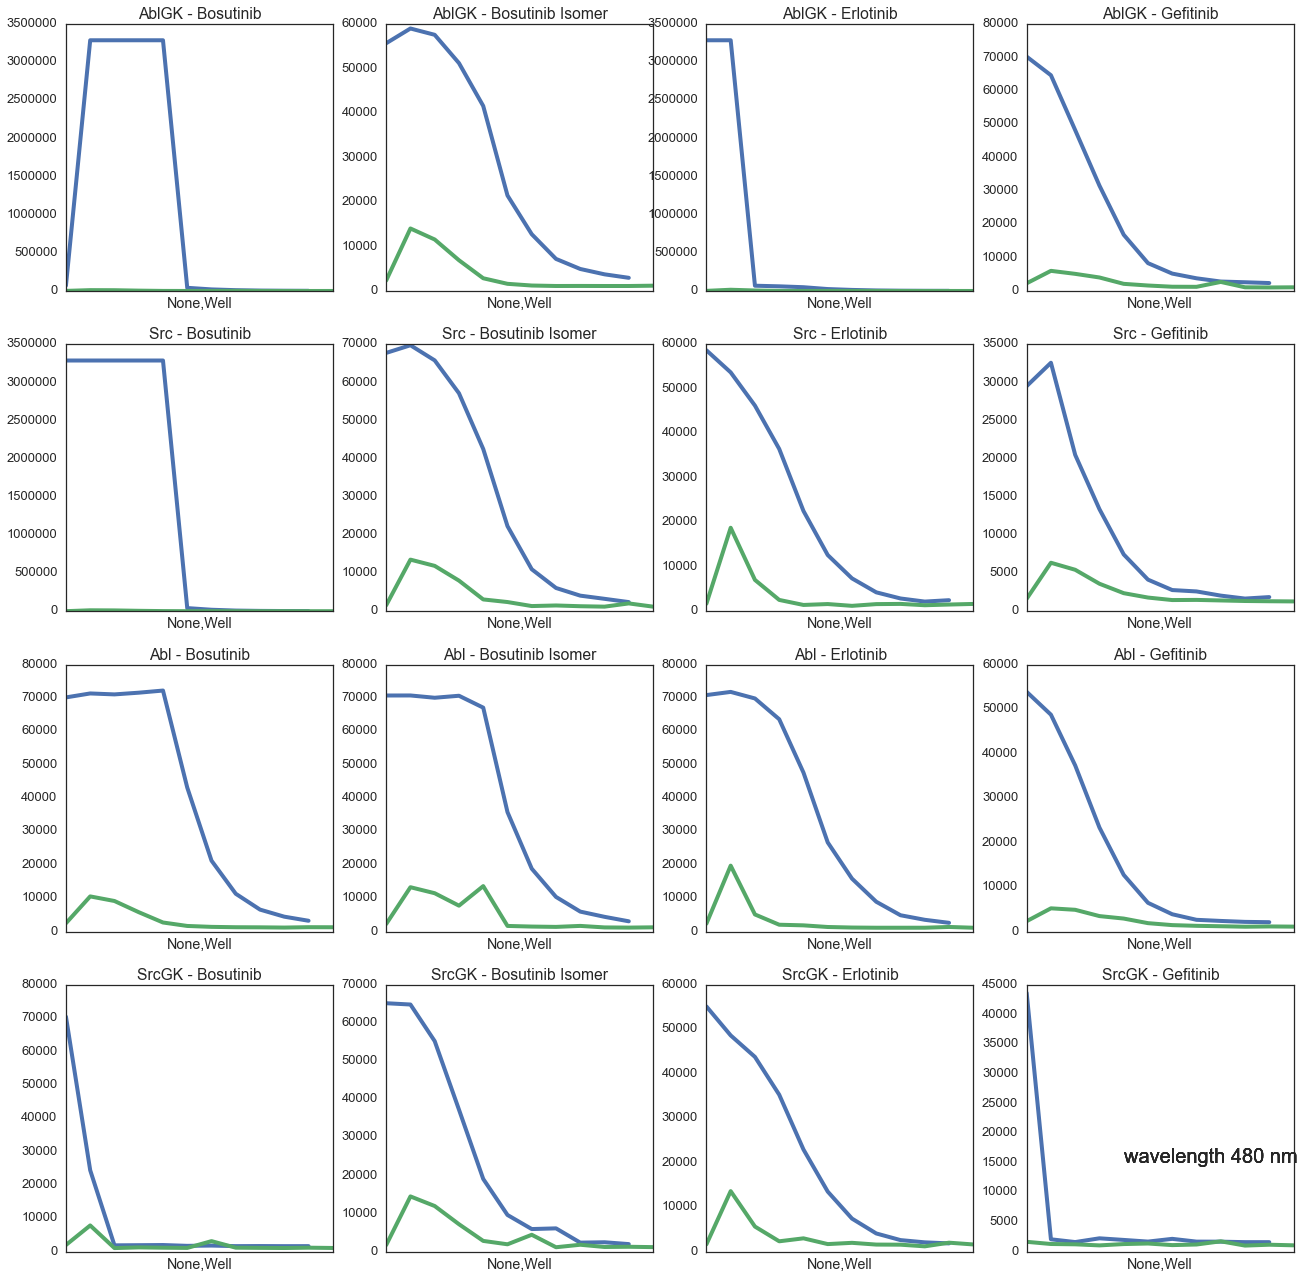

In [22]:
#This works for a full set of proteins
grant.plot_spectra2singlet(file_set,ligands,480,'Spectra_assay_singlets.png')